In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        # Train the Hopfield network with given patterns
        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)  # Reshape for matrix multiplication
            self.weights += np.dot(pattern, pattern.T)  # Outer product
        np.fill_diagonal(self.weights, 0)  # No self-connections
        '''The train method uses the outer product of the input patterns to create the weight matrix, ensuring that the diagonal is zero to prevent self-connections.'''

    def recall(self, pattern, steps=5):
        # Recall a pattern using the Hopfield network
        pattern = pattern.copy()
        for _ in range(steps):
            for i in range(self.num_neurons): # Update the state of neuron i
                activation = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if activation > 0 else -1  # Binary activation
        return pattern
        ''' The recall method updates the state of each neuron based on the weighted sum of its inputs over a specified number of steps.'''

In [11]:
def generate_synthetic_data(num_patterns, pattern_size):
    # Generate synthetic binary patterns
    patterns = np.random.choice([-1, 1], size=(num_patterns, pattern_size))
    return patterns

In [12]:
# Now just set the parameters
num_patterns = 5
pattern_size = 10

In [13]:
# Then generate synthetic data
patterns = generate_synthetic_data(num_patterns, pattern_size)

In [14]:
# Now we create and train Hopfield network
hopfield_net = HopfieldNetwork(num_neurons=pattern_size)
hopfield_net.train(patterns)

In [15]:
# Test the network with a noisy version of one of the patterns just because we can
test_pattern = patterns[0].copy()
test_pattern[2] = -test_pattern[2]  # Introduce noise
print("Test Pattern (with noise):", test_pattern)

Test Pattern (with noise): [ 1  1 -1 -1 -1  1 -1 -1 -1  1]


In [16]:
# Recall the pattern
recalled_pattern = hopfield_net.recall(test_pattern)
print("Recalled Pattern:", recalled_pattern)

Recalled Pattern: [ 1  1  1 -1 -1  1 -1 -1 -1  1]


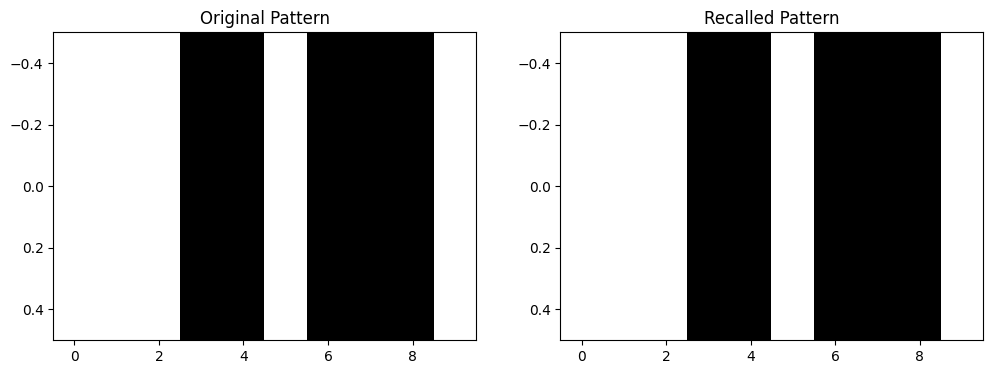

In [17]:
# OH MY GOD THAT WAS SO COOL

# We visualize now
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Original Pattern")
plt.imshow(patterns[0].reshape(1, -1), cmap='gray', aspect='auto')
plt.subplot(1, 2, 2)
plt.title("Recalled Pattern")
plt.imshow(recalled_pattern.reshape(1, -1), cmap='gray', aspect='auto')
plt.show()